In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE=224
BATCH_SIZE=32

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [4]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Alzheimer_Dataset',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  subset='training'
                                                  )

Found 1446 images belonging to 4 classes.


In [5]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Alzheimer_Dataset',
                                                  target_size=(IMG_SIZE,IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  subset='validation'
                                                  )

Found 359 images belonging to 4 classes.


In [8]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print("Class indices:",class_indices)
print("class names:",class_names)


Class indices: {'Mild': 0, 'Moderate': 1, 'Non': 2, 'Very mild': 3}
class names: ['Mild', 'Moderate', 'Non', 'Very mild']


In [14]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(4,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3053 - loss: 1.6118

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 293s 6s/step - accuracy: 0.3056 - loss: 1.6081 - val_accuracy: 0.3370 - val_loss: 1.3040
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 174s 4s/step - accuracy: 0.4052 - loss: 1.2476 - val_accuracy: 0.4680 - val_loss: 1.1515
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 173s 4s/step - accuracy: 0.5537 - loss: 0.9894 - val_accuracy: 0.5543 - val_loss: 0.9787
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 174s 4s/step - accuracy: 0.6720 - loss: 0.7408 - val_accuracy: 0.5850 - val_loss: 0.8865
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.7570 - loss: 0.5687 - val_accuracy: 0.6128 - val_loss: 0.8992


In [20]:
model.save('/content/drive/MyDrive/Alzheimer_Dataset/Sample.h5')

In [32]:
#TEST
#Step1:Load the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt#visualization
import numpy as np
model=load_model('/content/drive/MyDrive/Alzheimer_Dataset/Sample.h5')
print("Model loaded")

Model loaded


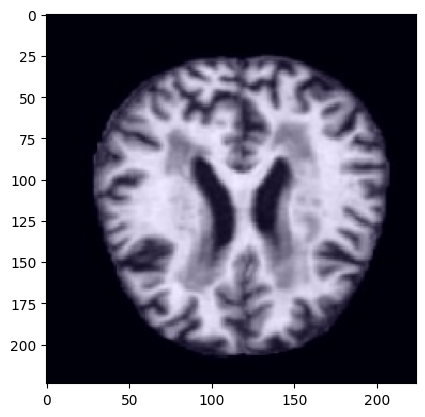

In [33]:
test_image_path="/content/drive/MyDrive/verymild.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [34]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.

In [37]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Non
